In [2]:
import numpy as np

## Task 1
Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]), ответ: 3

In [22]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])

def get_nonzero_diagonal_product(X):
    product = 1
    for i in range(min(X.shape)):
        diag_el = X[i, i]
        if diag_el != 0:
            product *= diag_el
    return product

def get_nonzero_diagonal_product_fast(X):
    diag = X.diagonal()
    nonzero_diag_elems = diag[diag.nonzero()]
    non_zero_prod = np.product(nonzero_diag_elems)
    return non_zero_prod

assert get_nonzero_diagonal_product(X) == get_nonzero_diagonal_product_fast(X)
print('slow')
%timeit get_nonzero_diagonal_product(X)
print('fast')
%timeit get_nonzero_diagonal_product_fast(X)

slow
The slowest run took 4.71 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.53 µs per loop
fast
The slowest run took 9.24 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.24 µs per loop


## Task 2
Дана матрица X и два вектора одинаковой длины i_idx и j_idx. Построить вектор np.array([X[i_idx[0], j_idx[0]], X[i_idx[1], j_idx[1]], . . . , X[i_idx[N-1], j_idx[N-1]]]). Для X = np.array(range(4 * 5)).reshape(4, 5) + 1, i_idx = np.array([1, 3, 0, 2]), j_idx = np.array([0, 2, 3, 1]) ответ: [6 18  4 12]

In [20]:
X = np.array(range(4 * 5)).reshape(4, 5) + 1
i_idx = np.array([1, 3, 0, 2])
j_idx = np.array([0, 2, 3, 1])

def task_2(X, i_idx, j_idx):
    res = []
    for i in range(len(i_idx)):
        res.append(X[i_idx[i], j_idx[i]])
    res = np.array(res)
    return res

def task_2_fast(X, i_idx, j_idx):
    return X[i_idx, j_idx]

%timeit task_2(X, i_idx, j_idx)
%timeit task_2_fast(X, i_idx, j_idx)

The slowest run took 5.24 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.11 µs per loop
The slowest run took 17.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.04 µs per loop


## Task 3
Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество. Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [23]:
# x = np.array([1, 2, 2, 4])
# y = np.array([4, 2, 1, 2, 5])
x = np.random.randn(1000, 1000)
y = np.random.randn(1000, 1000)

def equal_sets(x, y):
    return set(x.ravel()) == set(y.ravel())

def equal_sets_fast(x, y):
    return np.array_equal(np.unique(x), np.unique(y))

assert equal_sets(x, y) == equal_sets_fast(x, y)
print('slow')
%timeit equal_sets(x, y)
print('fast')
%timeit equal_sets_fast(x, y)

slow
1 loop, best of 3: 581 ms per loop
fast
10 loops, best of 3: 159 ms per loop


In [24]:
from collections import Counter

def equal_multisets(x, y):
    return Counter(x.ravel()) == Counter(y.ravel())

def equal_multisets_fast(x, y):
    return np.array_equal(np.unique(x, return_counts=True), np.unique(y, return_counts=True))

assert equal_multisets(x, y) == equal_multisets_fast(x, y)
print('slow')
%timeit equal_multisets(x, y)
print('fast')
%timeit equal_multisets_fast(x, y)

slow
1 loop, best of 3: 719 ms per loop
fast
10 loops, best of 3: 194 ms per loop


## Task 4
Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]), ответ: 5. 

In [26]:
import sys
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
# x = np.tile(x, 100)

def task_4(x):
    max_el = -sys.maxsize
    for i in range(len(x) - 1):
        if x[i] == 0:
            max_el = max(x[i + 1], max_el)
    return max_el

def task_4_fast(x):
    next_to_zero_idxs = np.argwhere(x == 0) + 1
    valid_next_idxs = next_to_zero_idxs[next_to_zero_idxs < x.size]
    return np.max(x[valid_next_idxs])
    
assert task_4(x) == task_4_fast(x)
print('slow')
%timeit task_4(x)
print('fast')
%timeit task_4_fast(x)       

slow
100000 loops, best of 3: 2.91 µs per loop
fast
The slowest run took 6.66 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.3 µs per loop


## Task 5
Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Для вывода используйте scipy.misc.imshow или matplotlib.pyplot.imshow

(340, 500, 3)
slow
1 loop, best of 3: 826 ms per loop
fast
100 loops, best of 3: 3.94 ms per loop


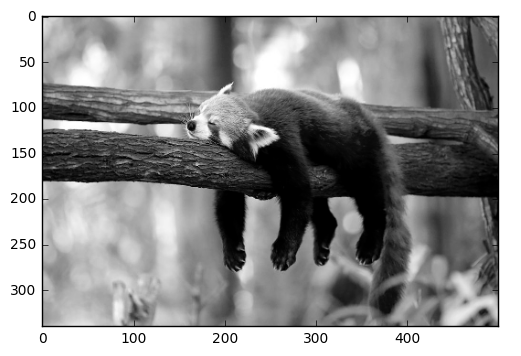

In [27]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

im_arr = misc.imread('red_panda.png')
print(im_arr.shape)

def task_5_slow(im_arr):
    gray_im_arr = np.zeros((im_arr.shape[0], im_arr.shape[1]), dtype='float64')
    gray_mult = np.array([0.299, 0.587, 0.114])
    for h in range(im_arr.shape[0]):
        for w in range(im_arr.shape[1]):
            for c in range(im_arr.shape[2]):
                gray_im_arr[h, w] += im_arr[h, w, c] * gray_mult[c]
    return gray_im_arr
    
def task_5_fast(im_arr):
    gray_mult = np.array([0.299, 0.587, 0.114])
    gray_im_arr = np.add.reduce(im_arr * gray_mult, axis=2)
    return gray_im_arr

np.testing.assert_array_almost_equal(task_5_slow(im_arr), task_5_fast(im_arr))

print('slow')
%timeit task_5_slow(im_arr)
print('fast')
%timeit task_5_fast(im_arr)

gray_im_arr = task_5_fast(im_arr)
plt.imshow(gray_im_arr, cmap='gray')

## Task 6
Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. Пример: x = np.array([2, 2, 2, 3, 3, 3, 5]). Ответ: (np.array([2, 3, 5]), np.array([3, 3, 1]))

In [28]:
x = np.tile(np.array([2, 2, 2, 3, 3, 3, 5]), 10)

# http://stackoverflow.com/a/32681075
def rle(x):
        n = len(x)
        if n == 0: 
            return np.array([]), np.array([])
        else:
            y = np.array(x[1:] != x[:-1])     # pairwise unequal (string safe)
            i = np.append(np.where(y), n - 1)   # must include last element posi
            z = np.diff(np.append(-1, i))       # run lengths
            p = np.cumsum(np.append(0, z))[:-1] # positions
            return(x[i], z)

def task_6(x):
    if len(x) == 0:
        return np.array([]), np.array([])
    
    elements = []
    counts = []
    elements.append(x[0])
    counts.append(1)
    for i in range(len(x) - 1):
        if x[i] == x[i + 1]:
            counts[-1] += 1
        else:
            elements.append(x[i + 1])
            counts.append(1)

    return np.array(elements), np.array(counts)

pos_slow, len_slow = task_6(x)
pos_fast, len_fast = rle(x)

np.testing.assert_array_equal(pos_slow, pos_fast)
np.testing.assert_array_equal(len_slow, len_fast)

print('slow')
%timeit task_6(x)
print('fast')
%timeit rle(x)        

slow
10000 loops, best of 3: 30.3 µs per loop
fast
The slowest run took 5.34 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 21.9 µs per loop
